Welcome to this exploration of plant disease data. Despite its seemingly simple structure, this dataset challenges us to uncover meaningful relationships between environmental factors and disease occurrence. If you find this analysis useful, please consider upvoting it.

**Table of Contents:**
* Imports and Environment Setup
* Data Loading
* Data Cleaning and Preprocessing
* Exploratory Data Analysis
* Predictive Modeling
* Summary and Future Work

In [1]:
# Imports and Environment Setup
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend for plt, if needed

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Setting a seaborn style
sns.set(style='whitegrid')

In [2]:
# Data Loading
df = pd.read_csv("C:\\Users\\DILEEP  V\\Desktop\\Data_Science_Projects\\Plant Desease pridiction\\plant_disease_dataset.csv")

# Display the first few rows of the dataframe
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (10000, 5)


,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [3]:
# Data Cleaning and Preprocessing

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Since the data is relatively small and clean, we assume no further cleaning is required.
# However, if missing values were detected, one might fill them or drop the rows accordingly.

# Checking data types
print('\nData Types:')
print(df.dtypes)

# For our dataset, all columns are numeric. No date columns to parse here.

Missing values in each column:
temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

Data Types:
temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object


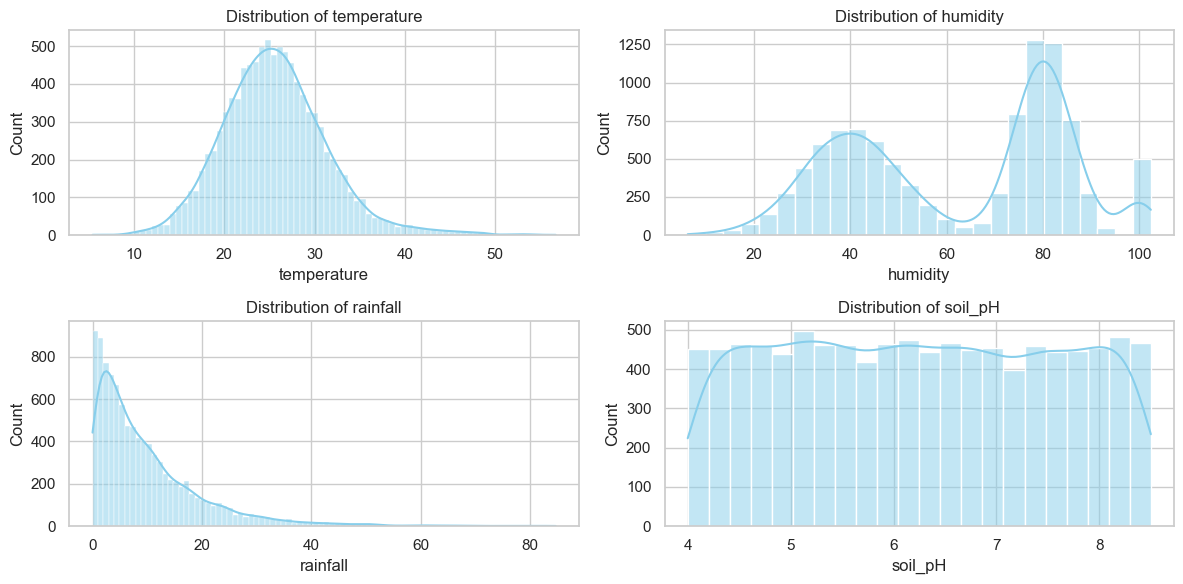

In [4]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1. Histograms for numeric features
num_columns = ['temperature', 'humidity', 'rainfall', 'soil_pH']
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

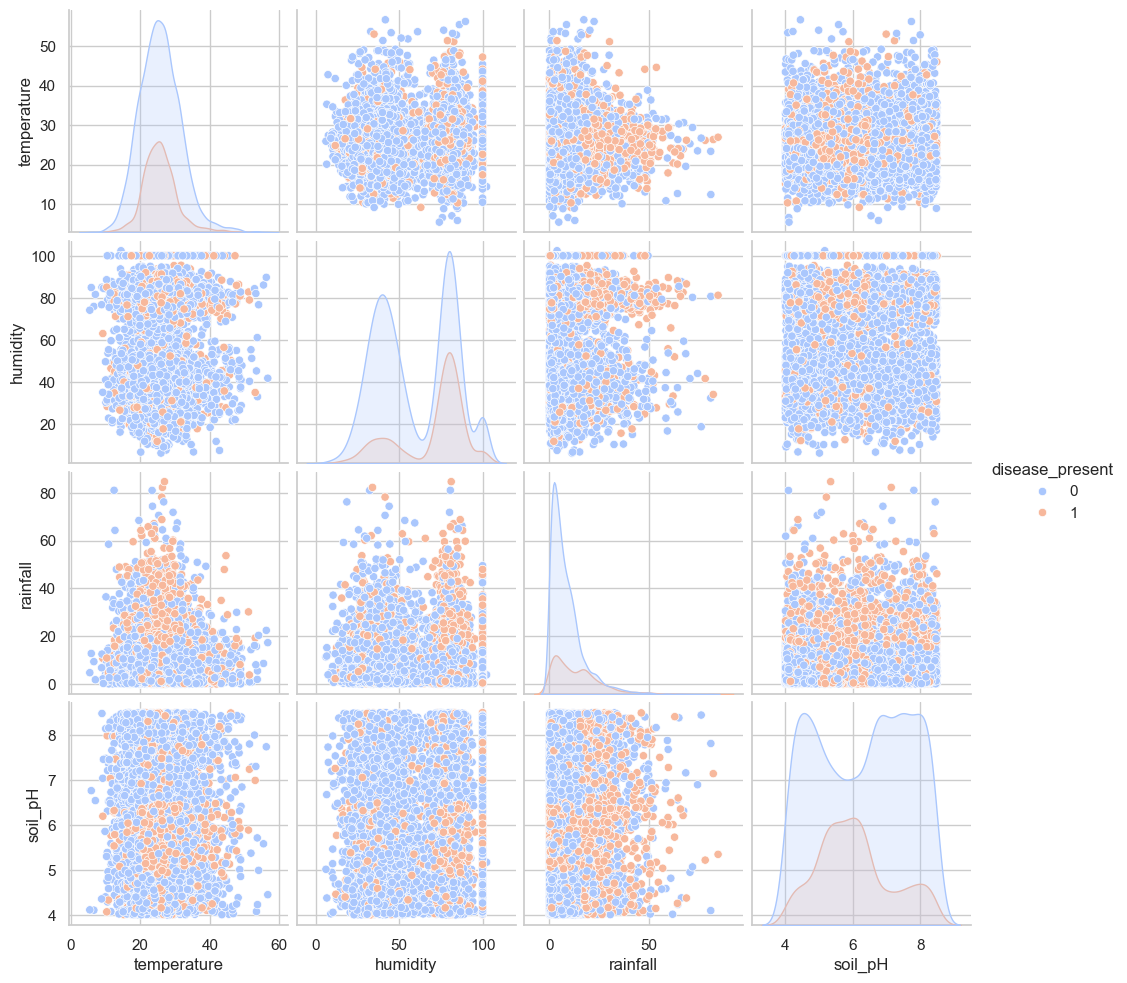

In [5]:
# 2. Pair Plot
sns.pairplot(df[num_columns + ['disease_present']], hue='disease_present', palette='coolwarm')
plt.show()

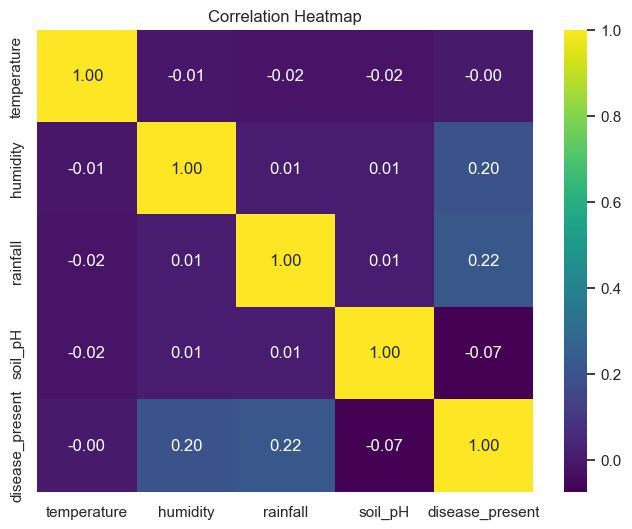

In [6]:
# 3. Correlation Heatmap - using only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

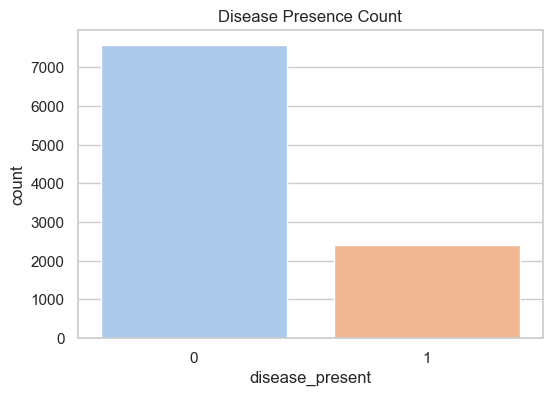

In [7]:
# 4. Count Plot (Pie Chart alternative) for the disease_present column
plt.figure(figsize=(6, 4))
sns.countplot(x='disease_present', data=df, palette='pastel')
plt.title('Disease Presence Count')
plt.show()

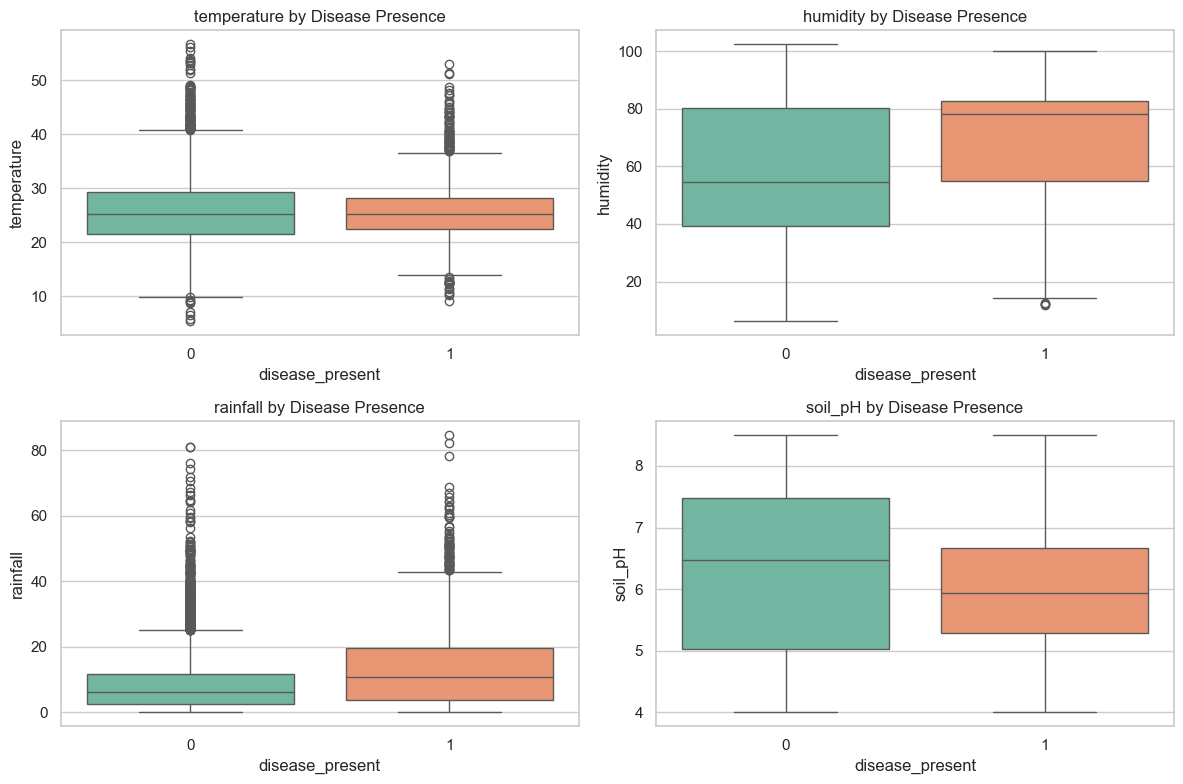

In [8]:
# 5. Box Plot for numeric features grouped by disease_present
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='disease_present', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Disease Presence')
plt.tight_layout()
plt.show()

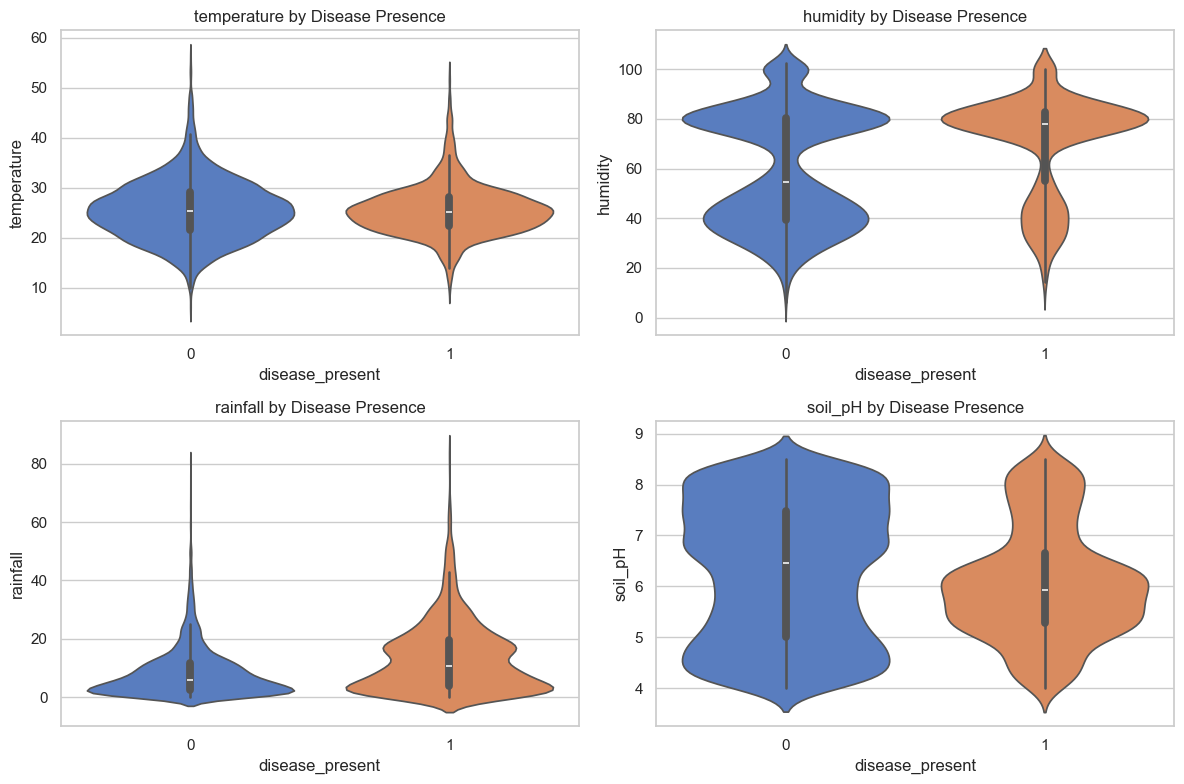

In [9]:
# 6. Violin Plot for numeric features grouped by disease_present
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='disease_present', y=col, data=df, palette='muted')
    plt.title(f'{col} by Disease Presence')
plt.tight_layout()
plt.show()

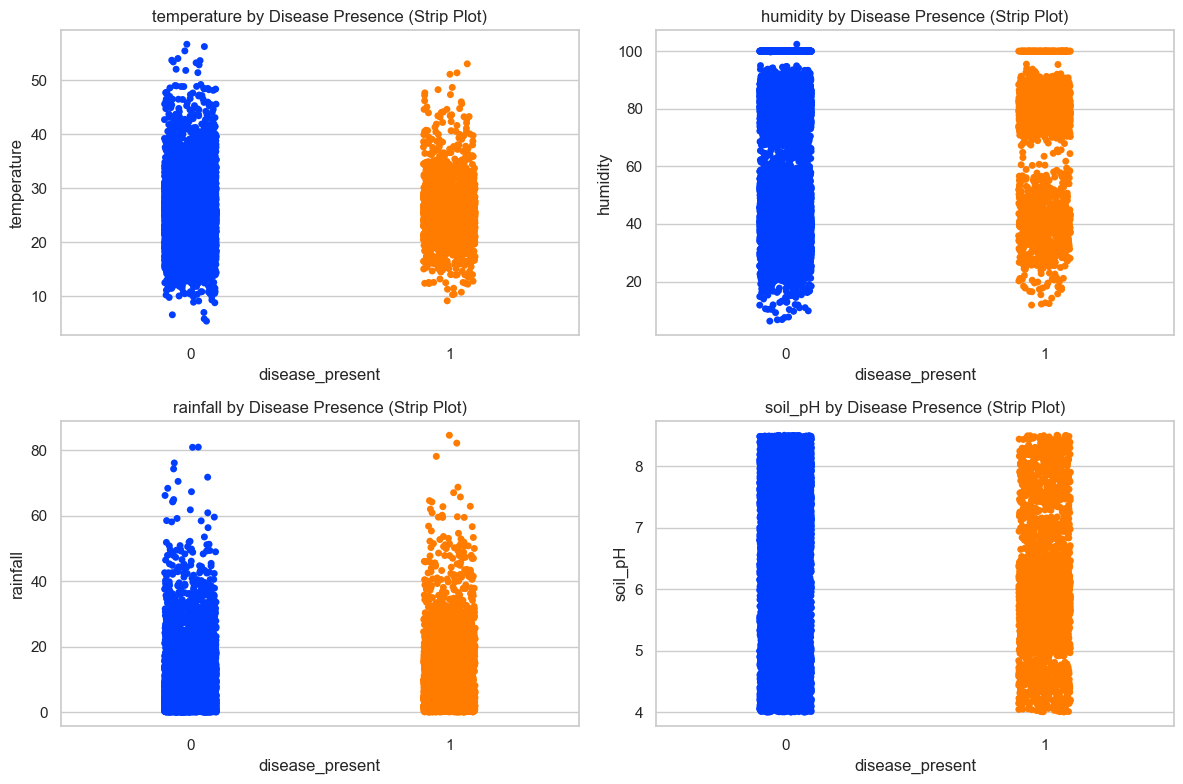

In [10]:
# 7. Strip Plot as an alternative view
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.stripplot(x='disease_present', y=col, data=df, jitter=True, palette='bright')
    plt.title(f'{col} by Disease Presence (Strip Plot)')
plt.tight_layout()
plt.show()

Accuracy Score: 0.76


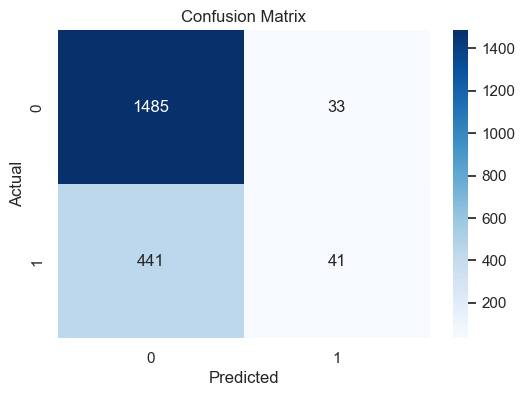

In [11]:
# Predictive Modeling
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
X = df[features]
y = df['disease_present']

# Optional: Standardize the features for better performance with some classifiers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the predictor
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

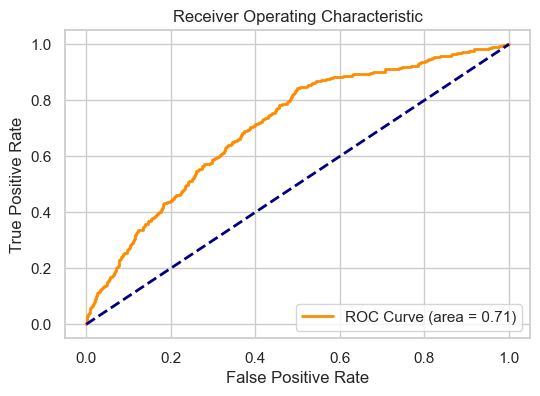

In [12]:
# ROC Curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

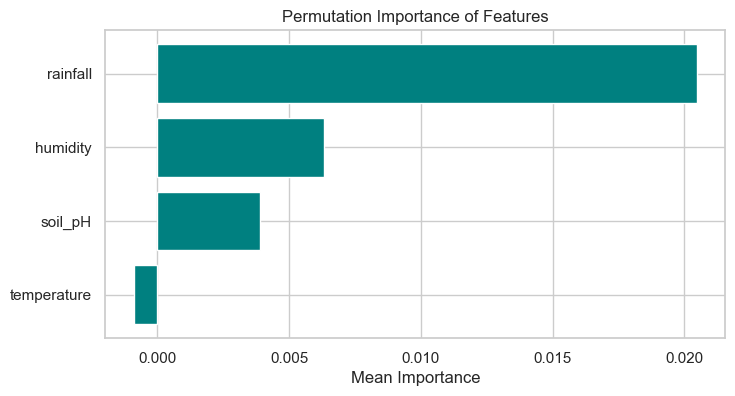

In [13]:
# Permutation Importance
r = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame({'feature': features, 'importance': r.importances_mean})
importance_df = importance_df.sort_values('importance', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['feature'], importance_df['importance'], color='teal')
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.show()

### Summary and Future Work

***This notebook took a close look at the plant disease dataset using a range of visualizations including histograms, pair plots, correlation heatmaps, and various categorical plots to explore the relationships between environmental variables and disease occurrence.***

***The predictive modeling section employed a Logistic Regression model to predict disease presence based on the available features. The model achieved a reasonable accuracy, and additional analyses such as the ROC curve and permutation importance provided insights into the performance and influential features.***

**Future analyses might include:**

* Experimentation with more complex models or ensemble methods.
* Cross-validation techniques to ensure model robustness.
* Feature engineering to potentially capture nonlinear relationships.
* Time-based analyses if data for different periods becomes available.

**We hope you found this exploratory analysis informative. If you did, please consider upvoting this notebook.**